## 1. Loss function(손실함수)
* Loss function은 classifier가 얼마나 잘 수행해내는지 알려줌
* weight 값을 판단하는 기준이 됨
* loss will be high, if we’re doing a poor job of classifying the training data
  
### 1) Multiclass Support Vector Machine loss (Hinge loss)
* (x_i, y_i)에서 x_i는 image, y_i는 (integer) label을 의미. 이때 scores vector: s=f(x_i, W)
* SVM loss는 다음과 같이 구한다
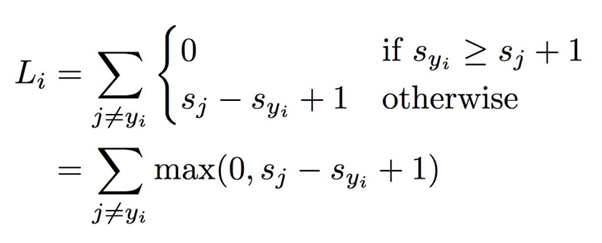
* s_j는 잘못된 label의 score, s_yi는 제대로 된 label의 score 의미. 1은 safety margin
* s_j – s_yi + 1 = s_j – (s_yi – 1). (correct label score – 1)보다 큰 incorrect label score가 있다면 loss는 0보다 크게 됨
* 가능한 loss의 min 값은 0, max 값은 무한대
* 만약 j=y_i인 경우도 포함한다면 loss값이 모두 1씩 증가하여 loss의 평균 값도 1 증가

* 전체 dataset에 대한 loss 값은 평균 낸 값
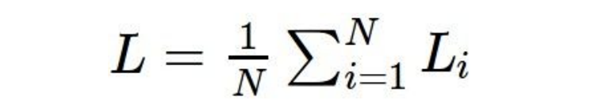
* 일반적으로 weight 값은 작은 값으로 초기화 -> score 값이 0에 가까운 값으로 나타남 -> 이때의 SVM loss는 max(0, 0-0+1) = 1이므로 초기의 전체 SVM loss 값은 (class – 1) -> sanity check에 이용됨

* squared hinge loss는 다음과 같다
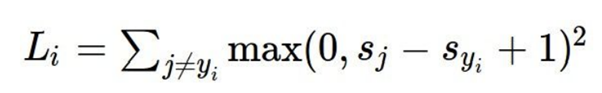
* 제곱을 해서 non linear하게 되고, 차이가 생김
* 제곱을 하지 않은 hinge loss가 일반적이지만 경우에 따라 squared hinge loss를 사용하기도 함

* Multiclass SVM loss example code
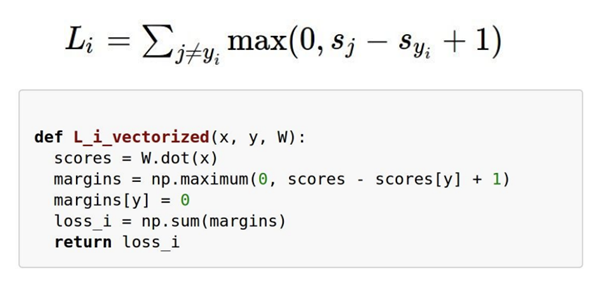

##### Regularization
* unique한 weight 값을 지정해주기 위해 regularization 개념 등장
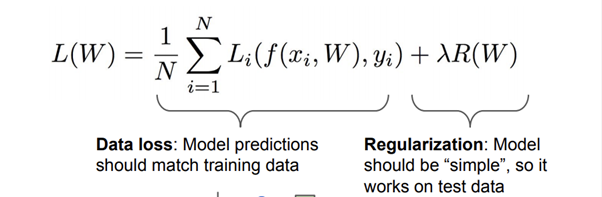
* Data loss : training dataset에 최적화하려고 함
* Regularization : test data에 최대한 일반화하려고 함
* -> data에 fit하고 가장 최적화된 weight값을 추출
* weight regularization을 더해주면 training data에 대한 정확도는 안 좋아지겠지만 test data에 대한 정확도는 좋아짐

##### L2 regularization
* weight 값을 0에 가깝도록 유도
* weight를 최대한 spread out 해서 모든 데이터 값의 input feature들을 고려함
* “diffuse over everything” 동일한 score라면 weight가 최대한 spread out된 것을 선호함

##### λ 값
* 높으면 모델이 단순해짐
    * underfitting 위험 존재
* 낮으면 모델이 복잡해짐
	* overfitting 위험 존재

### 2) Softmax classifier 
* scores = unnormalized log probabilities of the classes
* s = f(x_i;W)
* Softmax loss(Cross entropy loss)는 다음과 같이 구한다
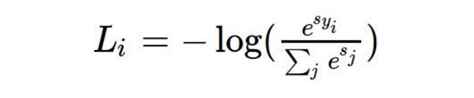
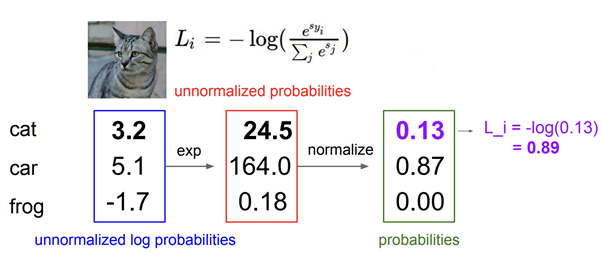
* L_i의 가능한 min값은 0, max는 무한
* weight값이 초기에 0에 가까운 값으로 초기화될 때 loss는 -log(1/class) -> sanity check에 이용

## 3) Softmax vs. SVM
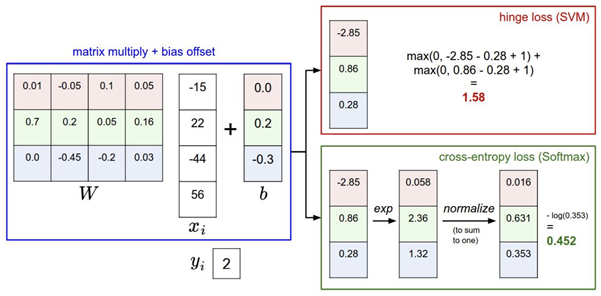
* datapoint의 score 값을 약간 변경했을 때,
* softmax는 데이터에 민감해서 모든 data 값을 다 고려하기 때문에 loss 값이 변함
* svm은 데이터에 둔감해서 data 값들이 변하게 되더라도 loss 값은 변하지 않음

## 2. Optimization
* loss를 minimize하는 최적의 weight를 찾아가는 과정

##### Strategy 1: Random search
* 절대로 사용해서는 안되는 전략 very bad idea 
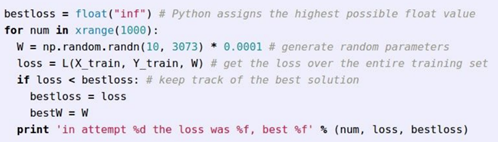

##### Strategy 2: Follow the slope

###### numerical gradient
* evaluate the gradient numerically
* 1차원인 경우
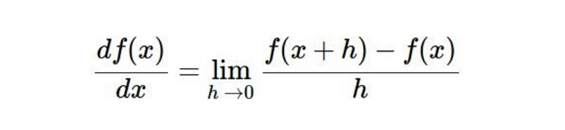
* 다차원인 경우
	* gradient는 vector로 나타남
* approximate, slow, easy to write 

###### analytic gradient
* use calculus to compute gradient
* exact, fast, error-prone

## 3. Gradient Descent
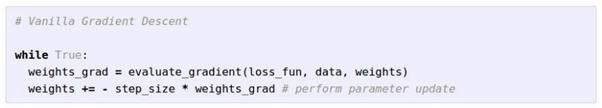
* step size는 learning rate이라고도 불림. 
* Learning rate와 regularization strength는 모두 hyperparameter이라 최적의 값을 찾는 게 매우 중요함
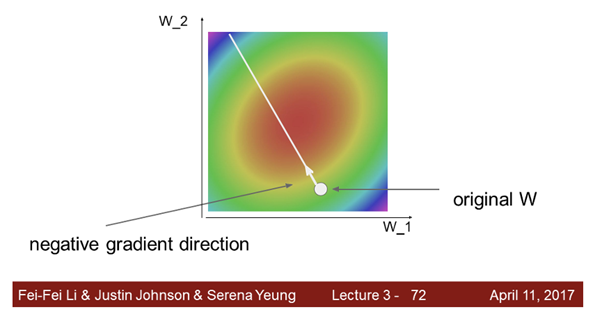
* 임의의 위치에서 가운데 빨간색 지점으로 가는 것, 즉 기울기가 0에 가까운 지점으로 가는 것이 목표
* full batch gradient descent: training set 전체를 이용
* mini batch gradient descent: small portion of the training set 이용

##### Stochastic Gradient Descent (SGD)
* mini batch gradient descent의 대표적인 예
* approximate sum using a minibatch of examples 32/64/128 common

## 4. Image features - CNN 등장 이전의 방식들
* CNN이 나오기 전 image classification 이 이루어진 방식
* image feature를 추출한 다음에 concatenation 시켜서 하나의 giant column vector를 만들어 linear classifier 적용

##### example: color histogram
* 모든 pixel들의 color를 추출

##### example: histogram of oriented gradients (HoG)
* edge들의 orientation feature를 추출
* 방향값을 히스토그램으로 표현

##### example: bag or words
* 이미지의 random patch 잘라 냄 -> 이미지에서 각도, 색깔 등의 image feature 추출 -> 새로운 이미지가 들어오면 이미지를 잘라내어 cluster과 비교

이처럼 특징을 추출해서 linear classifier에 적용하는 방식이 아니라, model이 스스로 이미지 특징을 뽑아내도록 하는 것이 CNN